DepthAnything
====

**Depth Anything: Unleashing the Power of Large-Scale Unlabeled Data**

 * Paper: https://arxiv.org/abs/2401.10891

![DepthAnything Mdoel](../assets/depthanything_overview.png)

```bash
pip install torch torchvision
pip install transformers
```

## Inference via the pipeline

Device set to use cuda:0


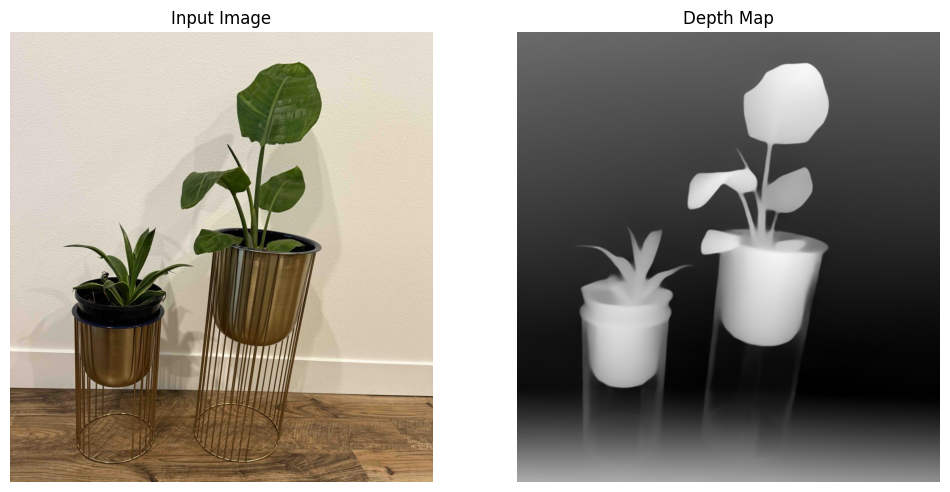

In [3]:
from PIL import Image
import matplotlib.pyplot as plt
from transformers import pipeline

# load pipe
pipe = pipeline(
    task="depth-estimation",
    model="LiheYoung/depth-anything-base-hf"
)

image_path = "../samples/plants.jpg"
image = Image.open(image_path).convert("RGB")

# inference
depth = pipe(image)["depth"]

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image)
axes[0].set_title("Input Image")
axes[0].axis("off")
axes[1].imshow(depth, cmap="gray")
axes[1].set_title("Depth Map")
axes[1].axis("off")
plt.show()

## Inference via model class

In [4]:
from transformers import AutoImageProcessor, AutoModelForDepthEstimation
import torch
import numpy as np

device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

image_processor = AutoImageProcessor.from_pretrained(
    "LiheYoung/depth-anything-base-hf"
)
model = AutoModelForDepthEstimation.from_pretrained(
    "LiheYoung/depth-anything-base-hf"
).eval().to(device)

In [5]:
inputs = image_processor(images=image, return_tensors="pt")
inputs = inputs.to(device)

with torch.no_grad():
    outputs = model(**inputs)
    predicted_depth = outputs.predicted_depth

# interpolate to original size
prediction = torch.nn.functional.interpolate(
    predicted_depth.unsqueeze(1),
    size=image.size[::-1],
    mode="bicubic",
    align_corners=False,
)

prediction.shape

torch.Size([1, 1, 1137, 1068])

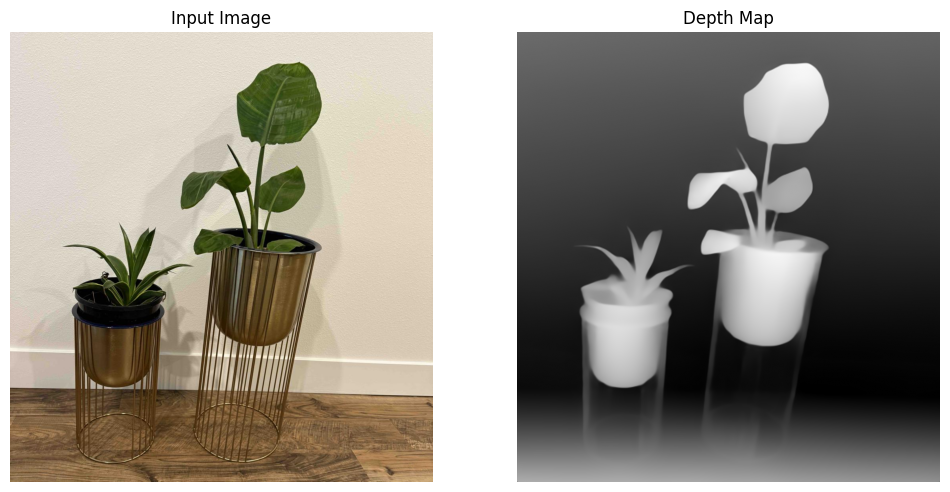

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].imshow(image)
axes[0].set_title("Input Image")
axes[0].axis("off")
axes[1].imshow(prediction[0, 0].cpu().numpy(), cmap="gray")
axes[1].set_title("Depth Map")
axes[1].axis("off")
plt.show()